# Introduction to Markov Networks



## CSCI E-83
## Stephen Elston

in the previous lesson we explored directed Bayes networks (BNs). BNs are directed acyclic graphs (DAGs) which can represent causality and independencies of many probability distributions. However, there is no unique representation of independencies. Many BNs can exhibit the same independency structure, but with different causal relationships. 

Now, we will turn our attention to another class of probabilistic graphical models known as **Markov networks** (**MNs**) or **Markov graphical models**, or **Markov random fields**. Markov graphic models are **undirected graphical models**. Yet, like BNs, Markov graphical models can represent independencies of many probability distributions. 

As you will see, for certain distributions there are methods to map from BNs to Markov networks and back. However, this is not universally the case, and there are independencies which can only be represented by a MN, but not a BN or vice versa. Further, there are distribution which have indepenencies which cannot be modeled with either. 

Like the directed Bayesian graphical models or DAGs, Markov networks provide a alternative **representation** method for probability distributions. The representation within an intelligent agent is illustrated schematically in the figure below. 

<img src="img/Representation.JPG" alt="Drawing" style="width:400px; height:200px"/>
<center> **Representation in an intelligent agent** </center>


**Suggested readings:** The following reading is an optional supplement to the material presented here:
- Barber, Sections 4.1, 4.2 or
- Murphy, Section 19.1, 19.2, 19.3.

## Markov Random Fields and Potentials

In the previous lesson we worked with directed acyclic graphical models. In this lesson we explore the theory of another class of graphical model, known as the **Markov Graphical Model** or **Markov Random Field**. 

### A simple example

We can use potentials to compute the multivariate probability distribution, $p(A,B,C,D)$. This distribution can be factorized as the normalized product of the **potentials**. 

There are 4 clicks in the graph, and therefore 4 potentials. The product of the potentials is also a potential.  

$$\tilde{p}(A,B,C,D) = \phi(A,B) \phi(A,C) \phi(B,D) \phi(C,D)$$

The product can be transformed into a probability by normalizing it:

$$p(A,B,C,D) = \frac{1}{Z} \tilde{p}(A,B,C,D)$$  

Where the normalizing constant, $Z$, is the **partition function**. In this case, it is just the sum over all the possible values of the product of the potentials for each click:

$$Z = \sum_{A,B,C,D} \tilde{p}(A,B,C,D)$$


### General potentials for MRFs

The formulation in the previous example is instructive, but not sufficient to generalize to complex graphs. The general formulation for computing a multivariate probability given the potentials is:    

$$p(x_1,\ldots,x_n) = \frac{1}{Z}  \prod_{c \in C} \phi_c (x_c) $$

Where $(x_1,\ldots,x_n)$ are the variables in the clique, and, $c$ is a click in the set of clicks $C$. The normalization by the partition function transforms the product of potentials into a distribution. The partition function is computed:

$$Z = \sum_{x_1,\ldots,x_n} \prod_{c \in C} \phi_c (x_c)$$

The formulation of the partition function exposes the computational difficulty of applying exact calculations for MRFs in practice. As you can see this computation can have significant complexity. In fact, this computational complexity can be prohibitive to the use of exact MRF models. 

Fortunately, there are approximate methods which can be used to compute the partition function:    
- Monte Carlo methods.
- Variational methods. 

## Relationship between DAGs and Markov networks  

As you have seen, the dependencies in some conditional probability distributions can be represented by the d-separation criteria on DAGs or directed Baysian graphical models. Further, by their very nature, DAGs model causality. As a result of these properties DAGs represent conditional probability distributions.  

In contrast, Markov networks are undirected graphs. As you will see, they can model independencies through another type of separation criteria. However, Markov networks model **potentials**, which are not probability distributions at all. You can think of Markov networks as representing correlations. 

## Separation in undirected graphs

In the previous lesson we saw how the concepts of the i-map and d-separation allow us to understand the independencies in DAGs. The question is how can we transform a DAG into a Markov network and what are the separation properties of the resulting undirected graph? 

You can develop a useful view of the relationship between BNs and MNs by transforming a directed graph into a MN. First, we need to introduce some definitions:  

> **Definition:** An **immorality** in a directed graph $G$ occurs where either; a) there is a directed edge between $X$ and $Y$, or b) $X$ and $Y$ are both parents of the same note $Z$. 

This leads to a concept of a **moralized graph** that relates a directed BN to an undirected MN:

> **Definition:** A **moral graph**, $M(G)$, of a BN structure, $G$ is the **undirected graph** over $X$ that contains an undirected edge between $X$ and $Y$ if; a) there is a directed edge between $X$ and $Y$, or b) $X$ and $Y$ are both parents of the same note $Z$.

This leads us to a corollary of relating the independencies of the directed BN to the independencies of a MN:

> **Corollary:** Given a distribution $P_B$ such that $B$ is a parameterization on a graph $G$, then $M(G)$ is an I-map for $P_B$.

What does all of this mean? In summary, we can create an MN representing an independency structure starting with a DAG. However, this does not mean that the independency structure will be the same. The example in the Figure below will help to illustrate this idea. 

<img src="img/MoralizedGraph.JPG" alt="Drawing" style="width:600px; height:200px"/>
<center> **Example of Graph Moralization** </center>

Referring to the above illustration: 
1. The original DAG is shown on the left. The variable Z is the evidence variable. Z is said to **block** the path from X to W. 
2. The undirected **ancestral** graph is shown in the center. Since W has a blocked path in the DAG it is not part of the ancestral graph. U, X, Y and Z are all ancestors of W, and form the ancestral graph. 
3. We can make the following assertion about the DAG; $P(X,U\ |\ Z) = P(X\ |\ Z)\ P( U\ |\ Z)$.  This situation is an **immorality** since X and U are parents of Z. In other words, X and U are independent given evidence Z, which **blocks** the path from X and U. 
4. The graph is **moralized** by adding an edge between X and U as shown on the right. 

Given the two definitions and the corollary, in this case, the resulting moralized undirected graph has the same independencies as the original DAG. If the DAG is an I-map of the distribution the undirected graph will also be an I-map.  

Now we will explore the properties of the undirected graph resulting from the moralization process. The conditional independencies in the undirected moralized graph can be thought of as **separating** subsets of the Markov network. 

## Representation with MNs

The foregoing has all be rather abstract. Let's try simple example. For this example, we will factor a probability distribution on a graphical model into potentials. We will use the student letter example we used it the previous lesson. The DAG representing the distribution, $P(I,D,G,S,L)$, is shown in the figure below.

<img src="img/LetterDAG.JPG" alt="Drawing" style="width:300px; height:250px"/>
<center> DAG for student letter and GRE score </center>

Referring to the above figure, we can factorize the directed graph or BH as conditional probabilities:

$$P(I,D,G,S,L) = P(I)\ P(D)\ P(S\ |\ I)\ P(G\ |\ I, D)\ P(L\ |\ G)$$

Notice that the **directed edges** of the graph provide **causal relationships**. We will loose this causality when we transform the representation to an undirected graph. 

With **undirected edges** we must model the **correlations** between the variables. We factorize the distribution on the MN using potentials. There is a potential for each **clique** on the **moralized** undirected graph. As a first step we need to create the undirected graph and moralize it:

<img src="img/MoralizedLetter.JPG" alt="Drawing" style="width:800px; height:300px"/>
<center> Transforming DAG to Moralized MN </center>

The graph is now undirected. The addition of the edge between $I$ and $D$ moralizes this graph.

Let's try this transformation with some code. As a first step we must import the required packages and specify the DAG or Bayesian network. 

In [2]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt 

%matplotlib inline

## Cliques on undirected graphs

In order to factorize an undirected graph we must first decompose it into **cliques**. We can define a clique as follows:

> **Definition:** A **clique** is a fully connected set of neighbors on an undirected graph.

Potentials are actually defined over **maximal cliques**, which we can define as:

> **Definition:** A **maximal clique** is a clique which cannot be enlarged without violating the clique property. 

Let's apply these definitions to an example to find cliques, as illustrated in the figure below. 

<img src="img/Cliques1.JPG" alt="Drawing" style="width:600px; height:250px"/>
<center> **Cliques of a Chain Markov Network** </center>

On the left side of the figure is a simple **chain** MN. There are only two possible **fully connected** cliques. These two cliques are $\{1,2\}$ and $\{2,3\}$ as illustrated above.

The above example is simple, unrealistically so. The figure below shows a somewhat more complex undirected graph with the maximal cliques highlighted in red.
<img src="img/Cliques2.JPG" alt="Drawing" style="width:600px; height:250px"/>
<center> **Maximal cliques of a Undirected Graph** </center>

The MN in the above diagram has two fully connected cliques; $\{1,2,3\}$ and $\{2, 3, 4\}$. The sets $\{1,2\}$, $\{2,3\}$, $\{3,4\}$, and $\{1,4\}$ cannot be maximal cliques as each node has other connections that will form fully connected cliques. Further, $\{1,2,4\}$ and $\{1, 3, 4\}$ cannot be cliques as they are not fully connected. 


In [3]:
student_model = BayesianModel([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S'), ('L', 'A'), ('S', 'A')])

CDP_D = TabularCPD(variable='D', variable_card=2, values=[[0.7], [0.3]])
CDP_I = TabularCPD(variable='I', variable_card=2, values=[[0.8], [0.2]])
CDP_L = TabularCPD(variable='L', variable_card=2, 
                   values=[[0.1, 0.4, 0.99],
                           [0.9, 0.6, 0.01]],
                   evidence=['G'], # Leter depends on the grade
                   evidence_card=[3])
CDP_S = TabularCPD(variable='S', variable_card=2,
                   values=[[0.95, 0.2],
                           [0.05, 0.8]],
                   evidence=['I'], # GRE score depneds on intelligence
                   evidence_card=[2])
CDP_G = TabularCPD(variable='G', variable_card=3, 
                   values=[[0.3, 0.05, 0.9,  0.5],
                           [0.4, 0.25, 0.08, 0.3],
                           [0.3, 0.7,  0.02, 0.2]],
                  evidence=['I', 'D'],
                  evidence_card=[2, 2])
CPD_A = TabularCPD(variable='A', variable_card=2, 
                   values=[[0.9, 0.8,  0.7, 0.2],
                           [0.1, 0.2, 0.3, 0.8]],
                  evidence=['L', 'S'],
                  evidence_card=[2, 2])
student_model.add_cpds(CDP_D, CDP_I, CDP_S, CDP_G, CDP_L, CPD_A)
student_model.check_model()

True

We the DAG specified we can find any immoralities with the `get_immoralities` method.

In [4]:
student_model.get_immoralities()

{('D', 'I'), ('L', 'S')}

Now, we can create an undirected or Markov network with the `to_markov_model` method. 

In [5]:
student_mn = student_model.to_markov_model()

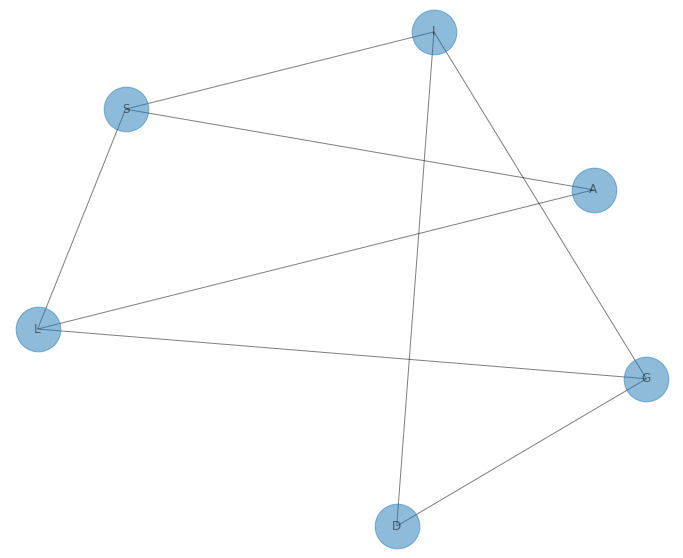

In [6]:
fig,ax = plt.subplots(figsize=(12,10))
nx.draw(student_mn, with_labels=True, alpha=0.5, node_size=2000, ax=ax)

## Potentials and the Hammerly-Clifford theorem

In undirected Markov networks we associate maximal cliques with **potential functions** or **factors**. 

**Hammerly-Clifford theorem:** Let $p(x)$ be a strictly positive distribution and let $G$ be an undirected graph, the **conditional independence properties** of $p(x)$ are satisfied if and only if the distribution can be represented as a product of factors, one factor representing each maximal clique, $c$, of $G$:

$$p(x\ |\ \Theta) = \frac{1}{Z(\theta)} \prod_{c \in G} \psi_c (x_c\ | \theta_c)$$   
Where,  
$$Z(\theta) = \sum_x \prod_{c \in G} \psi_c (x_c\ | \theta_c)$$

Here $Z(\theta)$ is a partition function that ensures the distribution is in the range $\{0,1 \}$.

## Potentials and the Gibbs distribution

The Hammerly-Clifford theorem gives us a framework, but what are the potentials? One approach is to use an **energy based model**. This model helps us understand some of the deep connections between statistical mechanics and the potentials of MNs using the **Gibbs distribution**:

$$p(x\ |\ \theta) = \frac{1}{Z(\theta)} exp\big( - \sum_c \mathbb{E}(x_c\ |\ \theta_c) \big)\\
where\\
\mathbb{E}(x_c) = Expectation\ of\ energy\ of\ clique\ c$$

We can use the above result to represent a potential for a clique as:

$$\phi(x_c\ |\ \theta_c) = exp\big( -\mathbb{E}(x_c\ |\ \theta_c) \big)$$

We can interpret this representation as meaning that **high probability states** of the clique, $c$, have **low energy**. 

There are many ways to construct an energy function for MRFs:    
1. As a simple transformation of any potential. This is a most general formulation and can be used with most any potential function.
2. Actual physical potentials, such as for magnetic material (Ising model), or protein folding with molecular potential. 
3. A loss function which is minimized to find a distribution. Examples can include least squares minimization or measures of entropy. 

Let's look at an example of the first and most general case. 

We want to represent a distribution as the product of potentials: 

$$p(x_1,\ldots,x_n) = \frac{1}{Z}  \prod_{c \in C} \phi_c (x_c) $$

We can always transform this formulation into the product of Gibbs distributions:

\begin{align}
p(x_1,\ldots,x_n) &= \frac{1}{Z}  \prod_{c \in C} exp^{\phi_c (x_c)} \\
&= \frac{1}{Z}  \prod_{c \in C} \psi_c (x_c) 
\end{align}




In summary, potentials give us a method to represent conditional distributions by undirected graphs, given the correct independencies. 

## Factorization on Markov networks

Given this definition it is easy to find the cliques of the MN for the student example as illustrated in the figure below:

<img src="img/LetterCliques.JPG" alt="Drawing" style="width:600px; height:300px"/>
<center> **Cliques of the Undirected Markov Network** </center>

Ignoring single node cliques,the undirected moralized graph has 10 cliques; {D,I}, {D,G}, {G,I}, {I,S}, {G,L}, {L,S}, {L,A}, {S,A}, {D,I,G} and {L,S,A}. Now, we are in a position to factorize unconditional distribution represented by the MN into a set of clique potentials:

$$P(I,D,G,S,L) = \frac{1}{Z} \phi(G,L)\ \phi(I,S)\ \phi(D,I,G)\ \phi(L,S,A) \\
= \frac{1}{Z} exp\{ - \mathbb{E}(I,S) - \mathbb{E}(G,L) - \mathbb{E}(D,I,G) - \mathbb{E}(S,L,A)\}$$

Where    
$\mathbb{E}() = $ **expectation** operator,  
$\phi() = $ **clique potential**, and   
$Z = $ **Partition function**:

$$Z = \sum_{I,D,G,S,L,A} \phi(G,L)\ \phi(I,S)\  \phi(D,I,G)\ \phi(L,S,A))$$

To summarize, the joint probability distribution is modeled as the product of potentials of the undirected graph or MN.  

In [7]:
list(nx.enumerate_all_cliques(student_mn))

[['D'],
 ['G'],
 ['I'],
 ['L'],
 ['S'],
 ['A'],
 ['D', 'G'],
 ['D', 'I'],
 ['G', 'I'],
 ['G', 'L'],
 ['I', 'S'],
 ['L', 'S'],
 ['L', 'A'],
 ['S', 'A'],
 ['D', 'G', 'I'],
 ['L', 'S', 'A']]

In [8]:
student_moral = nx.moral_graph(student_model)
list(nx.enumerate_all_cliques(student_moral))

[['D'],
 ['G'],
 ['I'],
 ['L'],
 ['S'],
 ['A'],
 ['D', 'G'],
 ['D', 'I'],
 ['G', 'I'],
 ['G', 'L'],
 ['I', 'S'],
 ['L', 'S'],
 ['L', 'A'],
 ['S', 'A'],
 ['D', 'G', 'I'],
 ['L', 'S', 'A']]

In [9]:
from networkx.algorithms.approximation.clique import max_clique
max_clique(student_moral)

{'A', 'L', 'S'}

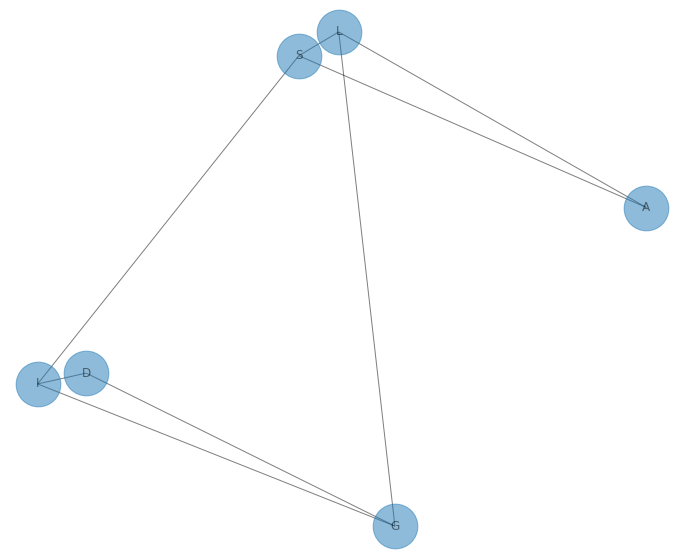

In [10]:
fig,ax = plt.subplots(figsize=(12,10))
nx.draw(student_moral, with_labels=True, alpha=0.5, node_size=2000, ax=ax)

In [11]:
student_mn.get_factors()

[<DiscreteFactor representing phi(D:2) at 0x1937ab91550>,
 <DiscreteFactor representing phi(I:2) at 0x1937ab914e0>,
 <DiscreteFactor representing phi(S:2, I:2) at 0x1937ab91358>,
 <DiscreteFactor representing phi(G:3, I:2, D:2) at 0x1937ab91278>,
 <DiscreteFactor representing phi(L:2, G:3) at 0x1937ab91668>,
 <DiscreteFactor representing phi(A:2, L:2, S:2) at 0x1937ab913c8>]

In [12]:
for i in range(6):
    print('\nDiscrete factor {}'.format(i))
    print(student_mn.get_factors()[i].__dict__)


Discrete factor 0
{'variables': ['D'], 'cardinality': array([2]), 'values': array([0.7, 0.3]), 'state_names': {'D': [0, 1]}, 'name_to_no': {'D': {0: 0, 1: 1}}, 'no_to_name': {'D': {0: 0, 1: 1}}}

Discrete factor 1
{'variables': ['I'], 'cardinality': array([2]), 'values': array([0.8, 0.2]), 'state_names': {'I': [0, 1]}, 'name_to_no': {'I': {0: 0, 1: 1}}, 'no_to_name': {'I': {0: 0, 1: 1}}}

Discrete factor 2
{'variables': ['S', 'I'], 'cardinality': array([2, 2]), 'values': array([[0.95, 0.2 ],
       [0.05, 0.8 ]]), 'state_names': {'S': [0, 1], 'I': [0, 1]}, 'name_to_no': {'S': {0: 0, 1: 1}, 'I': {0: 0, 1: 1}}, 'no_to_name': {'S': {0: 0, 1: 1}, 'I': {0: 0, 1: 1}}}

Discrete factor 3
{'variables': ['G', 'I', 'D'], 'cardinality': array([3, 2, 2]), 'values': array([[[0.3 , 0.05],
        [0.9 , 0.5 ]],

       [[0.4 , 0.25],
        [0.08, 0.3 ]],

       [[0.3 , 0.7 ],
        [0.02, 0.2 ]]]), 'state_names': {'G': [0, 1, 2], 'I': [0, 1], 'D': [0, 1]}, 'name_to_no': {'G': {0: 0, 1: 1, 2: 2

## Markov properties and separation in undirected graphs

 > **Definition:** For a graph $G$, **disjoint** subsets $A$ and $B$ are separated by subset $S$ if every path from $A$ to $B$ passes through $S$ then $S$ **separates** $A$ and $B$. Or, if $S = \emptyset$, then no path exists from $A$ to $B$, and $A$ and $B$ are **separated**.  
 
 > **Definition:** For a graph $G$ with disjoint sets $A$, $B$ and $S$, where $S$ separates $A$ and $B$, then $A\ \perp\ B\ |\ S$. This property is known as the **global Markov** property. 
 
An example of separation for in an undirected graph is shown in the figure below. There are five maximal cliques in this graph $\{ A, B, C \}$, $\{ C, R \}$, $\{ Q, R, S \}$, $\{ S, X \}$, and $\{ X, Y, Z \}$. The cliques $\{ A, B, C \}$ and $\{ X, Y, Z \}$ are separated by the clique $\{ Q, R, S \}$, as there is no path between these cliques that does not go though $\{ Q, R, S \}$. We can write this relationship formally as $\{ A, B, C \} \bot \{ X, Y, Z  \}\ |\ \{ Q, R, S \}$.   

<img src="img/Separation.JPG" alt="Drawing" style="width:500px; height:200px"/>
<center> **Example of Separation in a Markov Network** </center>   



The foregoing definition leads to the concepts of **soundness** and **completeness**. 

> **Theorem:** For any graph $G$ that factorizes a distribution $P$ then $I(G) \subseteq I(P)$. This relationship is known as the **soundness** property.  

> **Claim:** For any graph $G$, with subsets $X$, $Y$ and $Z$, that factorizes a distribution $P$, if  $(X \bot Y\ |\ Z) \subseteq I(P)$ the d-$sep_G(X;Y\ |\ Z)$. This relationship is known as the **completeness** property.

## Markov blanket

> **Definition:** A subset $U$ is a **Markov blanket** of $X$ in the nodes $\chi$ of the graph $G$ if $X \notin U$ and if $U$ is a minimal set of nodes such that $(X\ \bot\ \chi - \{ X \} - U\ |\ U)\ \in\ I(P)$.

The concept of a Markov blanket is illustrated in the figure below. 

<img src="img/MarkovBlanket.JPG" alt="Drawing" style="width:300px; height:300px"/>
<center> **Markov blanket of a node in a graph** </center>   

In the above illustration the nodes, $\{ 2, 6, 7 \}$ are the Markov blanket of node $4$. You can see that the Markov blanket is the minimum subset of nodes which influence the node $4$. Conversely, node $4$ can only influence nodes in its Markov blanket. This is known as the **local Markov property**.

As an illustration of this concept using our student example, execute the code in the cell below to find the Markov blanket of the student's grade, $G$. 

In [13]:
list(student_mn.markov_blanket('G'))

['D', 'L', 'I']

In [14]:
list(student_mn.markov_blanket('L'))

['G', 'A', 'S']

We can also verify that the local independencies of our Markov network are correct. 

In [15]:
student_mn.get_local_independencies()

(D ⟂ S, A, L | I, G)
(G ⟂ A, S | I, D, L)
(I ⟂ A, L | D, G, S)
(L ⟂ I, D | A, G, S)
(S ⟂ D, G | I, A, L)
(A ⟂ I, D, G | L, S)

## D-separation

We have explored d-separation in the previous lesson. With the above separation discussion in mind we will briefly review this subject. Recall the definition of **d-separation**:

> **Definition:** Given subsets $X$, $Y$ and $Z$, $X$ and $Y$ are conditionally independent or **D-separated** conditioned on the subset $Z$ if they are separated on the moralized graph. 

The definition leads to another related definition:

> **Definition:** A graph $G$ is a **dependency map** or **D-map** of a distribution $P$ if the graph contains every conditional independence in $P$. We can represent this relationship as:

$$(X\ \bot\ Y\ |\ Z_G) \Leftarrow (X\ \bot\ Y\ |\ Z_P)$$

In [16]:
nx.d_separated(student_model, {'D'}, {'L', 'S', 'A'}, {'I','G'})

True

In [17]:
nx.d_separated(student_model, {'G'}, {'S', 'A'}, {'I','D','L'})

True

In [18]:
nx.d_separated(student_model, {'A'}, {'I', 'D', 'G'}, {'S','L'})

True

## Pairwise Markov property  

We have only seen the global Markov property and the local Markov property. We can introduce the following definition:

> **Definition:** Two nodes are conditionally independent given the other nodes in the graph if there is no direct edge between them. This property is the **pairwise Markov property**.  

There is a relationship between the three Markov properties:

$$Global \rightarrow Local \rightarrow Pairwise \rightarrow Global$$

## Do DAGs and Markov networks have equivalent representations?

We have seen that we can transform a DAG into a Markov networks. The question should be, are these representations truly equivalent? In general, the answer is no. As we have seen, the Markov network contains additional links from the moralization of the directed graph. As a result, independence information can be lost in the transformation in either direction. In addition, the undirected graph cannot represent the causality as is done in a DAG. 

For example, consider a distribution $p(X,Y,Z) = p(Z|X,Y)\ p(X)\ p(Y)$ which can be represented easily  by a DAG as is shown on the left side of the figure below. However, the moralized Markov network shown on the right has only a single clique $\phi(X,Y,Z)$. This MN representation does not allow us to infer the relationship $X\ \bot\ Y$.   

<img src="img/DAGvsMN.JPG" alt="Drawing" style="width:350px; height:150px"/>
<center> **DAG and Moralized MN have different idependencies** </center>

To address the question if we can create a DAG that can represent any Markov network, consider an example with the potentials $\phi(W,X)\ \phi(X,Y)\ \phi(Y,Z)\ \phi(Z,W)$. This network has several independencies:

- $\phi(X,Y)\ \bot\ \phi(Z,W)\ |\ \{ \phi(W,X), \phi(Y,Z) \}$
- $\phi(W,X)\ \bot\ \phi(Y,Z)\ |\ \{ \phi(X,Y), \phi(Z,W) \}$

The network is shown in the figure below. There is no singly connected acyclic graph that can represent this relationship. An example of such as situation is shown in the figure below. 

<img src="img/NoDAG.JPG" alt="Drawing" style="width:500px; height:150px"/>
<center> **Markov Network with no Equivalent DAG** </center>

From the above, you can see that there are limitations to the representations possible with either DAGs or Markov networks. We can conclude that there are several possible cases for independencies:

- Representable by a DAG but not an MN,
- Representable by an MN but not a DAG,
- Representable by both a DAG and an MN, 
- Not representable as a graphical model. 

#### Copyright 2018, 2019, Stephen F Elston. All rights reserved. 